## Reducing Bias and Standardizing Data

In this notebook, the data is cleaned and standardized and the bias is reduced. The data is visualized and the correlation of the features with the number of vehicles is calculated. 

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [26]:
data = pd.read_csv('../data/processed/augmented_data.csv')

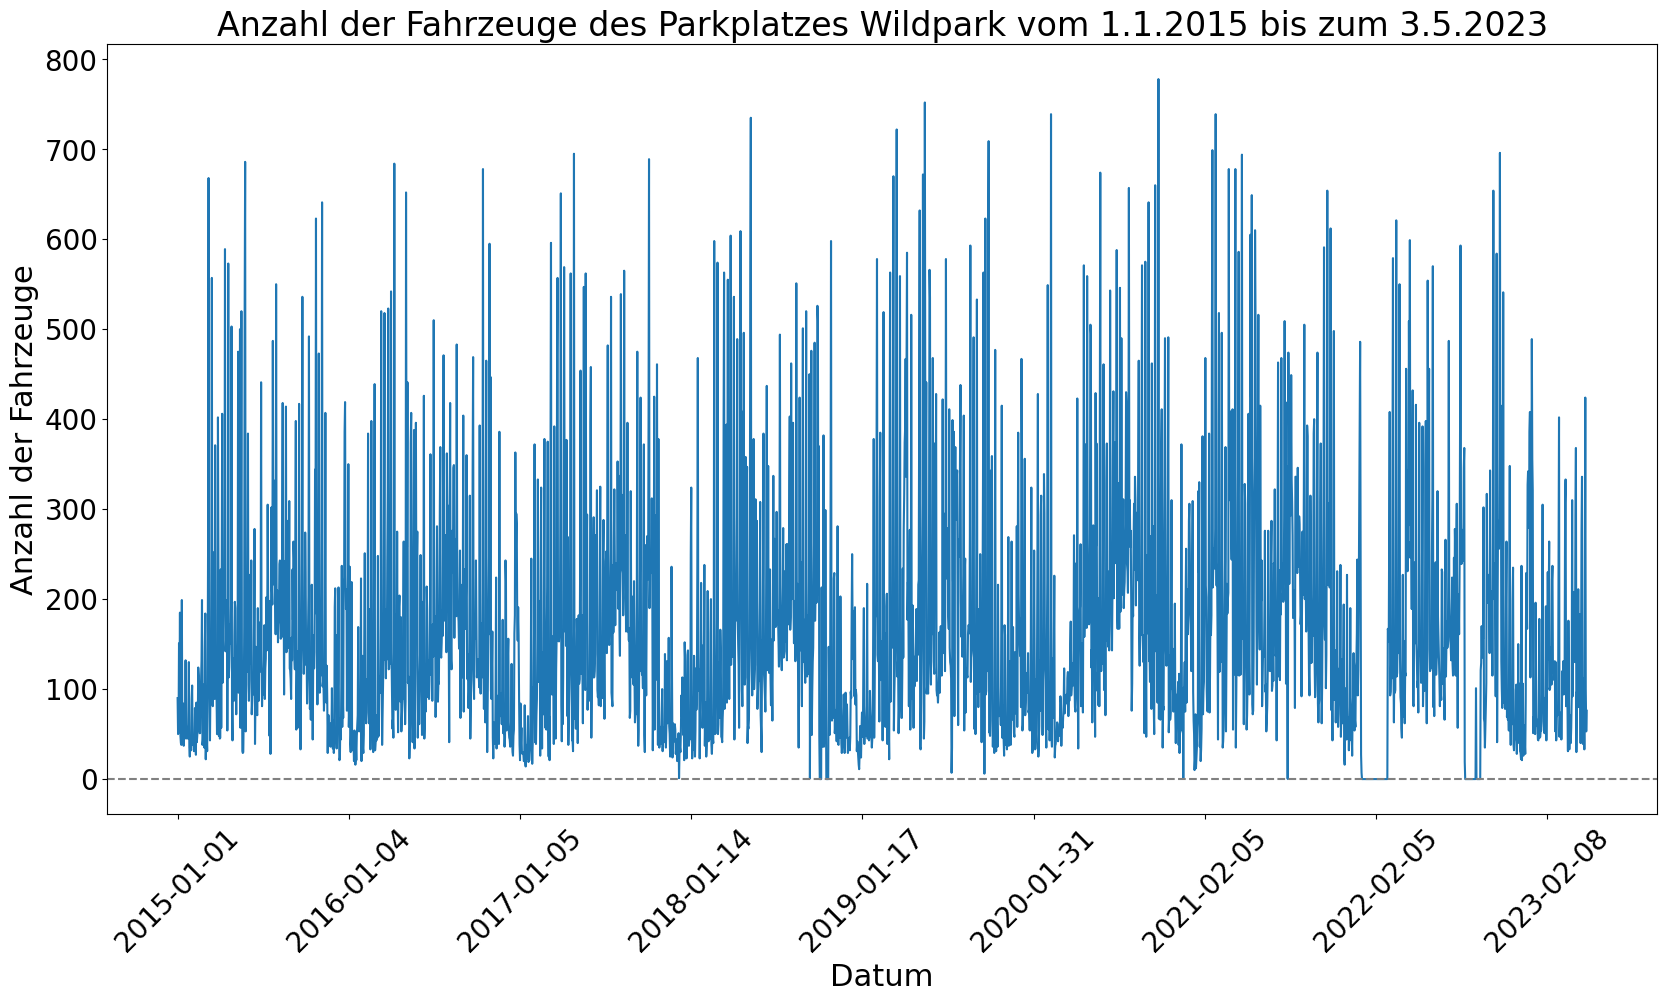

In [27]:
# Visualizing the number of vehicles on the Wildpark parking facility from 1.1.2015 to 3.5.2023

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(data['Anzahl_der_Fahrzeuge'])

# Set x-axis label
ax.set_xlabel('Datum', fontsize=22)

# Set y-axis label
ax.set_ylabel('Anzahl der Fahrzeuge', fontsize=22)

# Set title
ax.set_title('Anzahl der Fahrzeuge des Parkplatzes Wildpark vom 1.1.2015 bis zum 3.5.2023', fontsize=24)

# Set x-axis ticks every year
ax.set_xticks(np.arange(0, len(data['Anzahl_der_Fahrzeuge']), 365))
ax.set_xticklabels(data['Datum'].iloc[::365], rotation=45)

# Size of the axes labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Draw a horizontal line at 0
ax.axhline(y=0, color='grey', linestyle='--')

plt.show()

The utilization of the Wildpark parking space shows distortions caused by zero values. These zero values correspond to the days on which no vehicles were parked in the parking lot. These distortions must be removed to remove the bias they cause.

In [28]:
# show all rows with 0 vehicles
data[data['Anzahl_der_Fahrzeuge'] == 0]

,Datum,Anzahl_der_Fahrzeuge,Wochentag_sin,Wochentag_cos,Wochenende,Feiertag,Niederschlag (mm),Sonnenscheindauer (h),Lufttemperatur Mittelwert (°C),Windgeschwindigkeit Mittelwert (m/s)
1369,2018-10-18,0,0.433884,-0.900969,0,0,-0.1,7.3,12.4,0.6
1370,2018-10-19,0,-0.433884,-0.900969,0,0,-0.1,8.9,10.3,1.5
1371,2018-10-20,0,-0.974928,-0.222521,1,0,-0.1,6.2,13.2,1.0
1372,2018-10-21,0,-0.781831,0.623490,1,0,-0.1,5.9,10.2,1.0
1383,2018-11-01,0,0.433884,-0.900969,0,1,-0.1,6.1,10.7,1.5
...,...,...,...,...,...,...,...,...,...,...
2773,2022-09-14,0,0.974928,-0.222521,0,0,17.6,1.5,21.3,1.5
2774,2022-09-15,0,0.433884,-0.900969,0,0,14.4,0.7,18.3,0.6
2775,2022-09-16,0,-0.433884,-0.900969,0,0,19.9,1.1,15.5,1.0
2776,2022-09-17,0,-0.974928,-0.222521,1,0,3.9,0.4,10.3,1.0


In [29]:
# Remove all rows with 0 vehicles
data = data[data['Anzahl_der_Fahrzeuge'] != 0]

The missing values in the weather data are replaced by imputation. The mean value of the respective column is used for this purpose.

In [30]:
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Imputation of missing values for the column 'Windgeschwindigkeit Mittelwert (m/s)'
data['Windgeschwindigkeit Mittelwert (m/s)'] = imputer.fit_transform(data[['Windgeschwindigkeit Mittelwert (m/s)']])

# Imputation of missing values for the column 'Niederschlag (mm)'
data['Niederschlag (mm)'] = imputer.fit_transform(data[['Niederschlag (mm)']])

# show all rows with missing values
data[data.isnull().any(axis=1)]

,Datum,Anzahl_der_Fahrzeuge,Wochentag_sin,Wochentag_cos,Wochenende,Feiertag,Niederschlag (mm),Sonnenscheindauer (h),Lufttemperatur Mittelwert (°C),Windgeschwindigkeit Mittelwert (m/s)


The data is now cleaned and the data is being scaled. For this purpose, the min-max scaling is used to scale the data in the columns “Niederschlag (mm)”, “Sonnenscheindauer (h)”, “Lufttemperatur Mittelwert (°C)” and “Windgeschwindigkeit Mittelwert (m/s)” to a range of values to scale from 0 to 1.

In [31]:
# Create a MinMaxScaler
scaler = MinMaxScaler()

data['Niederschlag (mm)'] = scaler.fit_transform(data[['Niederschlag (mm)']])

data['Sonnenscheindauer (h)'] = scaler.fit_transform(data[['Sonnenscheindauer (h)']])

data['Lufttemperatur Mittelwert (°C)'] = scaler.fit_transform(data[['Lufttemperatur Mittelwert (°C)']])

data['Windgeschwindigkeit Mittelwert (m/s)'] = scaler.fit_transform(data[['Windgeschwindigkeit Mittelwert (m/s)']])

In [32]:
# Renaming the columns  

data.rename(columns={'Lufttemperatur Mittelwert (°C)': 'Lufttemperatur'}, inplace=True)

data.rename(columns={'Windgeschwindigkeit Mittelwert (m/s)': 'Windgeschwindigkeit'}, inplace=True)

data.rename(columns={'Sonnenscheindauer (h)': 'Sonnenscheindauer'}, inplace=True)

data.rename(columns={'Niederschlag (mm)': 'Niederschlag'}, inplace=True)

data

,Datum,Anzahl_der_Fahrzeuge,Wochentag_sin,Wochentag_cos,Wochenende,Feiertag,Niederschlag,Sonnenscheindauer,Lufttemperatur,Windgeschwindigkeit
0,2015-01-01,90,0.433884,-0.900969,0,1,0.000000,0.507042,0.140665,0.192308
1,2015-01-02,50,-0.433884,-0.900969,0,0,0.026069,0.211268,0.207161,0.115385
2,2015-01-03,53,-0.974928,-0.222521,1,0,0.203337,0.105634,0.350384,0.115385
3,2015-01-04,151,-0.781831,0.623490,1,0,0.000000,0.056338,0.437340,0.500000
4,2015-01-05,99,0.000000,1.000000,0,0,0.000000,0.507042,0.314578,0.500000
...,...,...,...,...,...,...,...,...,...,...
3000,2023-04-29,205,-0.974928,-0.222521,1,0,0.041710,0.535211,0.690537,0.192308
3001,2023-04-30,424,-0.781831,0.623490,1,0,0.037539,0.492958,0.652174,0.288462
3002,2023-05-01,100,0.000000,1.000000,0,1,0.107404,0.000000,0.590793,0.192308
3003,2023-05-02,53,0.781831,0.623490,0,0,0.026069,0.183099,0.583120,0.192308


The correlation of the features with the utilization and the other columns is calculated without considering the column 'Datum' and 'Number of vehicles'.

In [33]:
correlation = data.drop(columns=['Datum', 'Anzahl_der_Fahrzeuge']).corrwith(data['Anzahl_der_Fahrzeuge'])

correlation = correlation.sort_values(ascending=False)

correlation

Wochenende             0.510659
Sonnenscheindauer      0.347710
Lufttemperatur         0.284552
Wochentag_cos          0.163598
Feiertag               0.092849
Windgeschwindigkeit    0.027741
Niederschlag          -0.139639
Wochentag_sin         -0.388201
dtype: float64

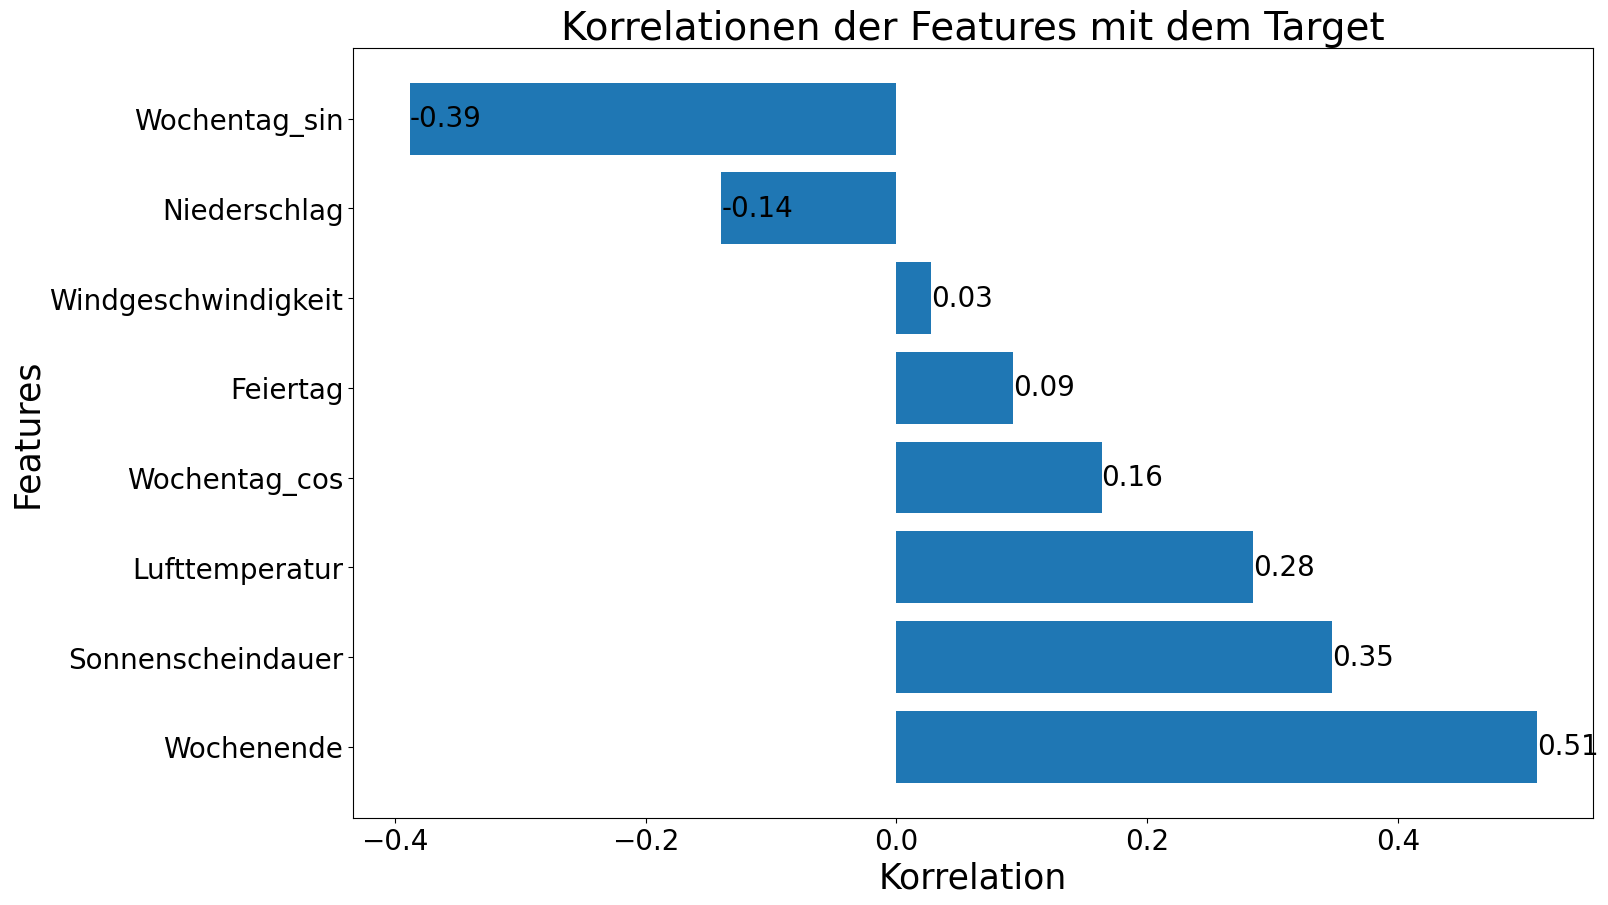

In [34]:
# Visualize the correlation of the features with the target 

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(16, 10))
ax.barh(correlation.index, correlation)

# Set x-axis label
ax.set_xlabel('Korrelation', fontsize=25)

# Set y-axis label
ax.set_ylabel('Features', fontsize=25)

# Set title
ax.set_title('Korrelationen der Features mit dem Target', fontsize=28)

# Size of the axes labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Add the correlation values to the plot
for i, v in enumerate(correlation):
    ax.text(v, i, str(round(v, 2)), color='black', va='center', fontsize=20)

plt.show()

The correlation of the features "Windgeschwindigkeit" with the target is very low. Therefore, this feature is removed. The correlation of "Feiertag" appears to be very low, but it is not removed because it is a categorical feature represented by one-hot encoding.

In [35]:
# Remove the column 'Windgeschwindigkeit'
data = data.drop(columns=['Windgeschwindigkeit'])

# Remove the colum 'Datum' because it is no longer needed for further processing
data = data.drop(columns=['Datum'])

The data is now preprocessed and ready for further processing. The data is saved in a CSV file.

In [36]:
# Speichern der Daten in einer CSV-Datei
data.to_csv('../data/processed/preprocessed_data.csv', index=False)